In [2]:
import numpy as np
import sympy as sp
from sympy import *
import matplotlib.pyplot as plt
import math


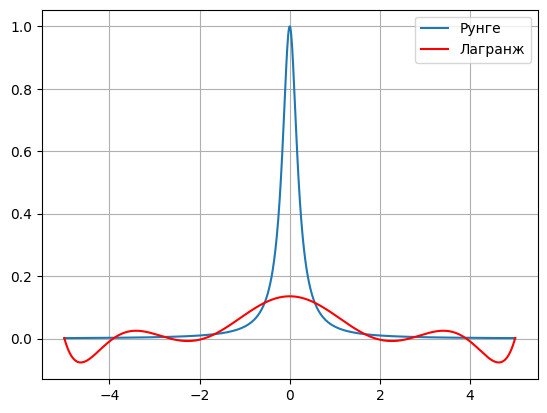

Значение Рунге при x=4: 0.0024937655860349127
Значение Лагранжа при x=4: -0.009193540822272523
разница: 0.011687306408307434

Значение Рунге при x=5: 0.001597444089456869
Значение Лагранжа при x=5: 0.001597444089456869
разница: 0.0


In [20]:
# zadaite funksiu runge f(x) = 1 / (1 + 25x^2) .......

def f(x):
    return 1 / (1 + 25 * x**2)

def lagrange(val, x, y):
    lagr = 0
    for i in range(len(x)):
        temp = y[i]
        for k in range(len(x)):
            if (i != k): temp *= (val - x[k]) / (x[i] - x[k])
        lagr += temp
    return lagr

x = np.linspace(-5, 5, 10)
y = [f(i) for i in x]
z = np.linspace(-5, 5, 1000)
plt.plot(z, f(z), label='Рунге')
plt.plot(z, lagrange(z, x, y), color='red', label='Лагранж')

plt.grid() # 10 interpolation nodes
plt.legend()
plt.show()

print('Значение Рунге при x=4:', f(4))
print('Значение Лагранжа при x=4:', lagrange(4, x, y))
print('разница:', np.abs(f(4) - lagrange(4, x, y)))
print()
print('Значение Рунге при x=5:', f(5))
print('Значение Лагранжа при x=5:', lagrange(5, x, y))
print('разница:', np.abs(f(5) - lagrange(5, x, y)))

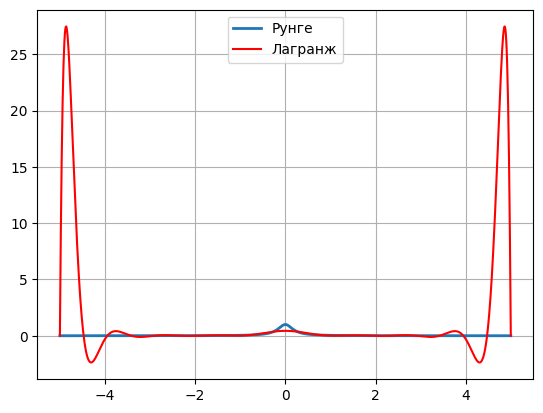

In [28]:
x = np.linspace(-5, 5, 20)
y = [f(i) for i in x]
z = np.linspace(-5, 5, 1000)
t = np.linspace(-5, 5, 1000)
plt.plot(z, f(z), label='Рунге', linewidth=2)
plt.plot(t, lagrange(t, x, y), label='Лагранж', color='red')

plt.legend() # 20 interpolation nodes 
plt.grid()
plt.show()

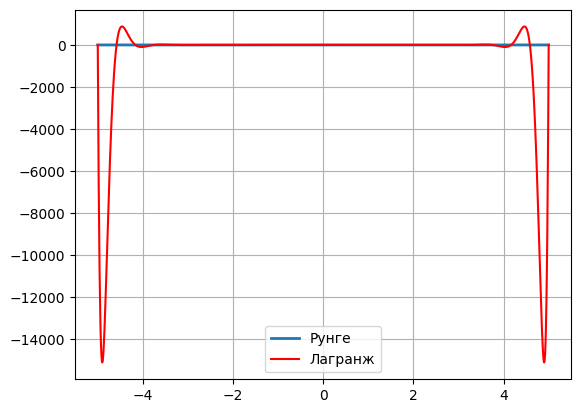

In [33]:
x = np.linspace(-5, 5, 25)
y = [f(i) for i in x]
z = np.linspace(-5, 5, 1000)
t = np.linspace(-5, 5, 1000)
plt.plot(z, f(z), label='Рунге', linewidth=2)
plt.plot(t, lagrange(t, x, y), label='Лагранж', color='red')

plt.legend()
plt.grid()
plt.show()